# Question 1

### I will use sklearn data to show the relationship between varaibles and target

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# training_and_test_set
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV
# model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

In [2]:
loans_df=pd.read_excel("Loans_Data_2019.xlsx")
loans_df.head() # Find data type

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,title,addr_state,dti,earliest_cr_line,inq_last_6mths,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,debt_settlement_flag
0,8000,8000,8000.000000,60 months,0.1649,196.64,D,D3,10+ years,MORTGAGE,...,consoildation,FL,11.23,1984-01-01,2,4479.84,4479.84,536.25,638.79,Y
1,5250,5250,3425.010843,36 months,0.1640,185.62,F,F3,6 years,MORTGAGE,...,weight loss surgery,TX,22.75,1996-10-01,0,4601.06,3000.00,2158.31,990.94,Y
2,35000,35000,34957.175890,60 months,0.2235,973.64,F,F5,< 1 year,MORTGAGE,...,Debt Consolidation Loan,MO,15.84,1994-10-01,2,23897.68,23830.67,3498.01,6229.59,Y
3,17500,17500,17500.000000,60 months,0.1727,437.47,D,D3,7 years,MORTGAGE,...,Debit Free,WA,21.31,2002-09-01,2,10037.70,10037.70,3077.85,3473.25,N
4,10000,10000,10000.000000,36 months,0.1065,325.74,B,B2,6 years,RENT,...,Other Loan,NY,11.47,2006-11-01,0,11726.32,11726.32,10000.00,1726.32,N


In [3]:
# For ordinal data(grade and sub_grade)
loans_df["grade_number"]=loans_df["grade"].map({"A":7,"B":6,"C":5,"D":4,"E":3,"F":2,"G":1})
#loans_df["grade_number"]

In [4]:
#For categorical data
loans_df["debt_settlement_flag"]=loans_df["debt_settlement_flag"].map({"Y":1,"N":0})
loans_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,addr_state,dti,earliest_cr_line,inq_last_6mths,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,debt_settlement_flag,grade_number
0,8000,8000,8000.000000,60 months,0.1649,196.64,D,D3,10+ years,MORTGAGE,...,FL,11.23,1984-01-01,2,4479.84,4479.84,536.25,638.79,1,4
1,5250,5250,3425.010843,36 months,0.1640,185.62,F,F3,6 years,MORTGAGE,...,TX,22.75,1996-10-01,0,4601.06,3000.00,2158.31,990.94,1,2
2,35000,35000,34957.175890,60 months,0.2235,973.64,F,F5,< 1 year,MORTGAGE,...,MO,15.84,1994-10-01,2,23897.68,23830.67,3498.01,6229.59,1,2
3,17500,17500,17500.000000,60 months,0.1727,437.47,D,D3,7 years,MORTGAGE,...,WA,21.31,2002-09-01,2,10037.70,10037.70,3077.85,3473.25,0,4
4,10000,10000,10000.000000,36 months,0.1065,325.74,B,B2,6 years,RENT,...,NY,11.47,2006-11-01,0,11726.32,11726.32,10000.00,1726.32,0,6


In [5]:
loans = pd.get_dummies(loans_df, drop_first = True)

In [6]:
#def get_status(x) : 
    #return pd.DataFrame([x.skew(), x.kurt(),x.median(),x.var()],
                        #index=['skew','kurt','median','var'])
#get_status(loans)

In [7]:
#the relationship between features and the target
correlation= np.abs(loans.corr()["debt_settlement_flag"]).sort_values(ascending=False)
correlation_sl = correlation.loc[(correlation > 0.2)].index.tolist()


In [8]:
plt.style.use('seaborn')

#for i in correlation_sl:
plt.figure()
#sns.distplot(correlation_sl[i])
#plt.xlabel(i)
#plt.ylabel('debt_settlement_flag')
#plt.savefig("variable_histogram_{0}.png".format(i))
#plt.title(i)

def plot(allow):
    """
    Draw hist figure of features 
    
    Args:
        allow: boolean, If the loan is allowed.
        
    """
    
    
    temp_df = loans[loans["debt_settlement_flag"] == allow]
    for feature in correlation_sl:
        plt.figure()
        plt.hist(temp_df[feature])
        plt.title("" + str(allow) + " " +  str(feature))

<Figure size 576x396 with 0 Axes>

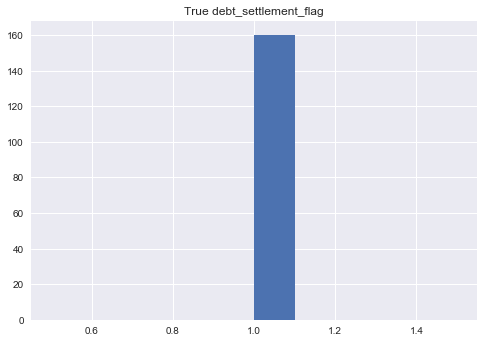

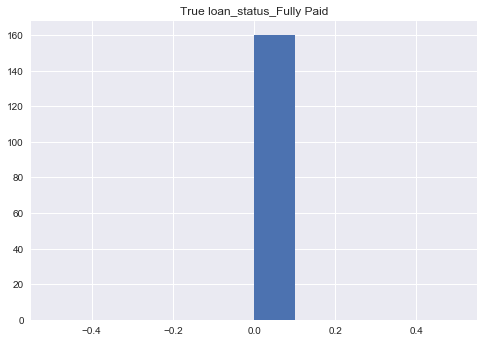

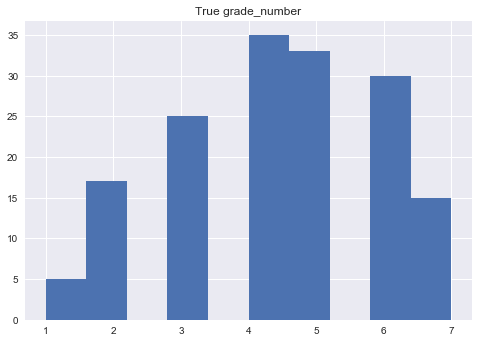

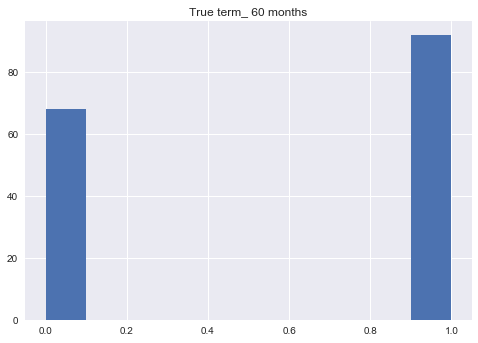

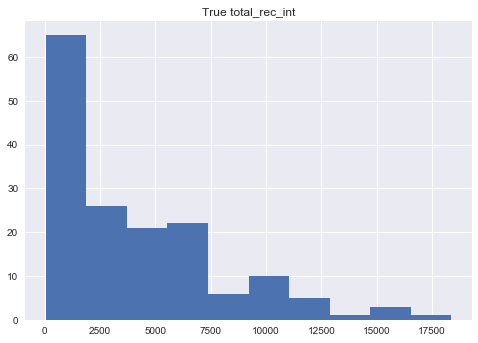

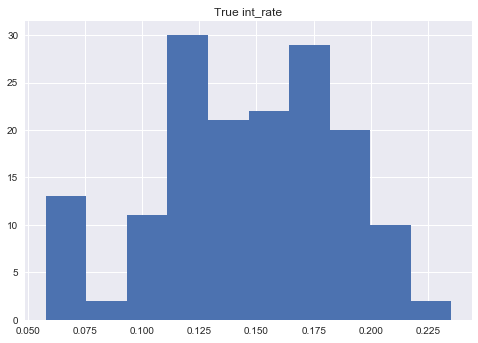

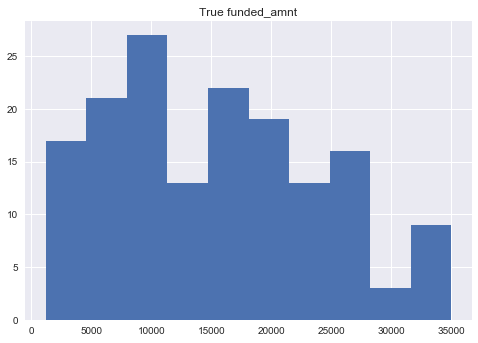

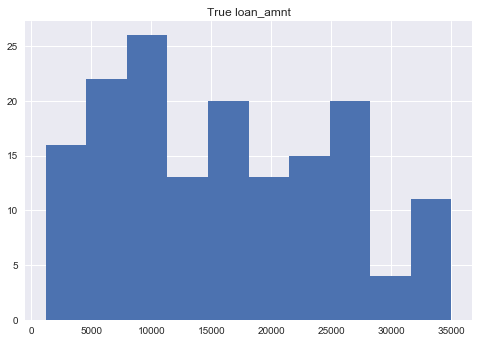

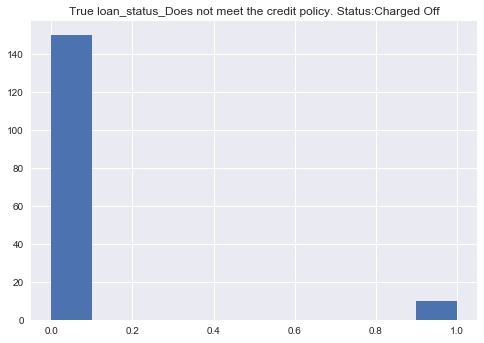

In [9]:
plot(True) 


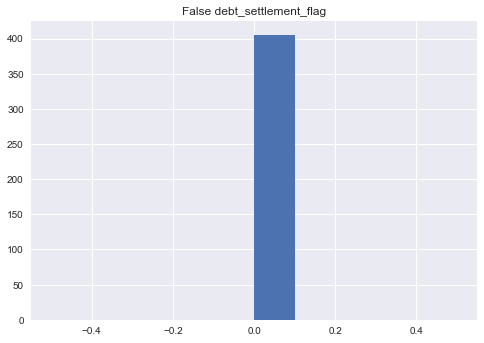

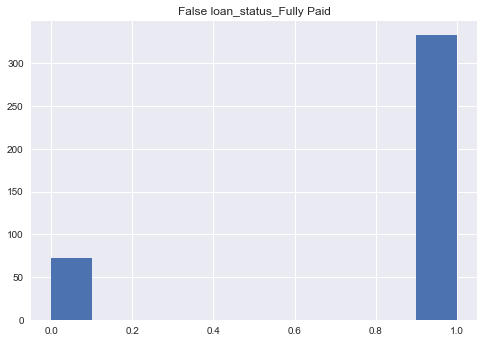

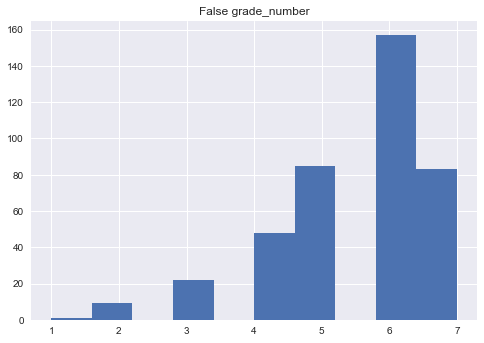

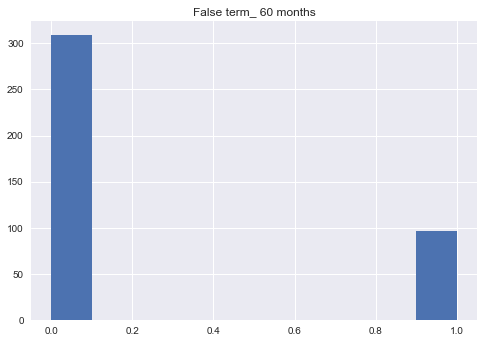

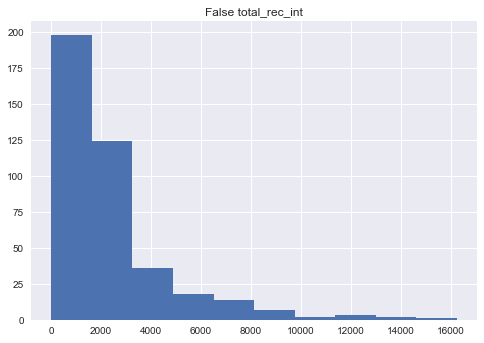

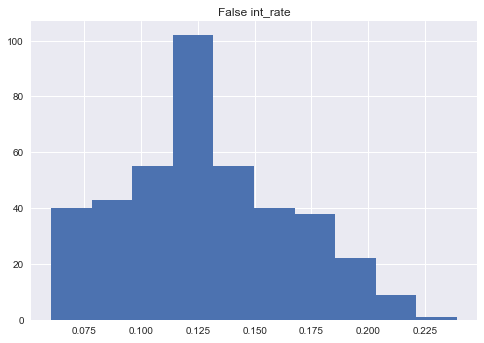

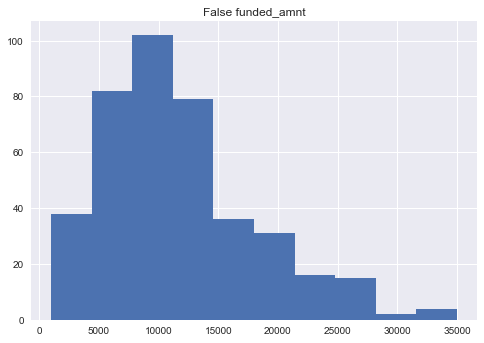

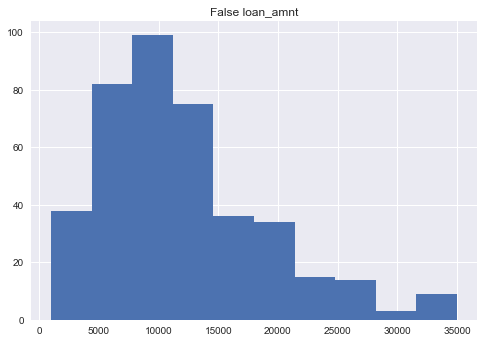

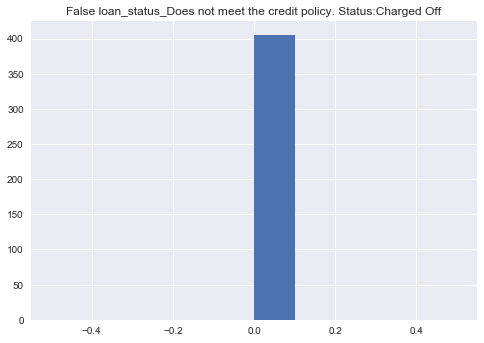

In [10]:
plot(False) 

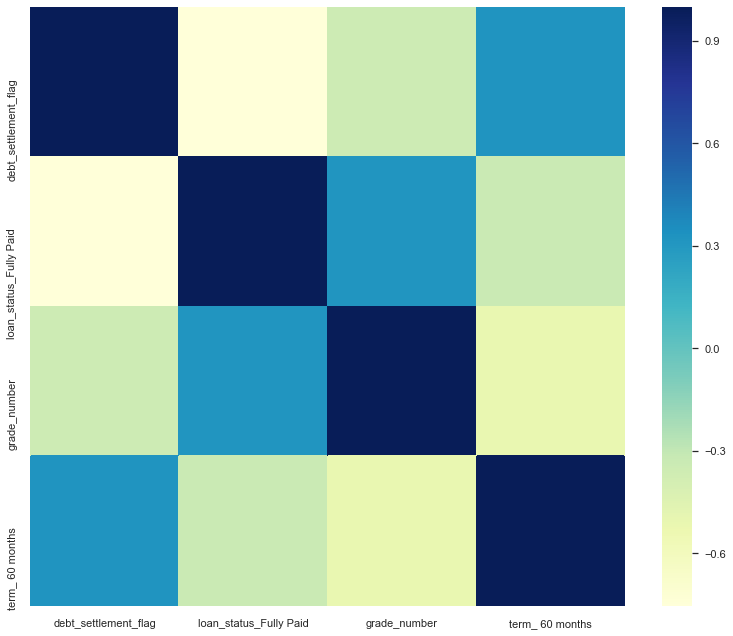

In [11]:
sns.set(style = "white")

# set up the matplotlib figure
f, ax =plt.subplots(figsize =(11,9))

features1 = ["debt_settlement_flag", "loan_status_Fully Paid", "grade_number", "term_ 60 months"]
loans.corr().loc[features1][features1]

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(loans.corr().loc[features1][features1], cmap="YlGnBu")
plt.savefig("heatmap.png")
plt.tight_layout()

In [12]:
loans["loan_status_Fully Paid"].skew()

-0.36434318091336493

In [13]:
loans["grade_number"].skew()

-0.7342767262453972

In [14]:
loans["term_ 60 months"].skew()

0.7118157373667643

这里解释是根据corrlation 选的就可以了么？选出的三个数据skew 都很大， 要log 处理然后画三个feature 的图么？？
看第三问的要求是 选出的三个 features that best fit the logistic regression model fro predict

In [15]:
# log transformation
log_grade=np.log1p(loans["grade_number"])
log_grade.skew()
#为什么越log越大

-1.4338752881731491

# Question 3

In [16]:
# three most relevant features "loan_status_Fully Paid","grade_number","term_ 60 months"
x =  loans[['loan_status_Fully Paid',"grade_number","term_ 60 months"]]
y = loans[['debt_settlement_flag']]

In [17]:
x_log = np.log1p(x)
y_log = np.log1p(y)

In [18]:
x_log_train, x_log_test, y_log_train, y_log_test = train_test_split(x, y, test_size=0.2, random_state=0)
log_res = LogisticRegression(random_state=0, fit_intercept=True)
log_res.fit(x,y)
y_log_estimate = log_res.predict(x_log_test)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
log_res.intercept_

array([1.48587527])

In [20]:
log_res.coef_

array([[-4.69578418, -0.22212697,  0.50250474]])

In [21]:
# 要看 test 的perfermance么

We can evaluate classification accuracy using confusion matrix and the classification report

In [22]:
from sklearn.metrics import confusion_matrix

pred_log = log_res.predict(x_log_test)

print(confusion_matrix(y_log_test,pred_log))

[[66 15]
 [ 5 27]]


In [23]:
from sklearn.metrics import classification_report  

print(classification_report(y_log_test, pred_log, digits=4))

              precision    recall  f1-score   support

           0     0.9296    0.8148    0.8684        81
           1     0.6429    0.8438    0.7297        32

    accuracy                         0.8230       113
   macro avg     0.7862    0.8293    0.7991       113
weighted avg     0.8484    0.8230    0.8291       113



# Question 2

In [24]:
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))


def loss_logsit(x_test, t ,beta):
    
    X_test_add_one = np.column_stack((x_test, np.ones(len(x_test))))
    model_0 = sigmoid(np.dot(X_test_add_one, beta))
    loss_temp = t * np.log(model_0) + (1 - t) * np.log(1 - model_0) 
    return  -(np.sum(loss_temp) / len(x_test))


def myLogisticGD(X, t, beta, alpha, numIterations):
    
    X_add_one = np.column_stack((X,np.ones(len(X))))
    for i in range(0,numIterations):
        hypothesis = np.dot(X_add_one, beta)
        h = sigmoid(hypothesis)
        loss = h - t 
        cost = loss_logsit(X, t, beta)
        loss_total[i] = cost
        gradient = np.dot(X_add_one.transpose(), loss) / len(X)
        beta = beta - alpha * gradient
        beta_total[i,:]= beta.transpose()
    return beta

def show_loss(loss_total,alpha):
    
    fig1 = plt.figure()
    plt.plot(loss_total, label = "Loss fucntion")
    #plt.plot(beta_total[:,0], label = "Beta0")
    #plt.plot(beta_total[:,1], label = "Beta1")
    #plt.plot(beta_total[:,2], label = "Beta2")
    #plt.plot(beta_total[:,3], label = "Beta3")
   # plt.plot(beta_total[:,4], label = "Beta4")
    plt.legend(loc="upper right")
    plt.xlabel("Number of iteration")
    title = "Alpha: " + str(alpha)
    plt.title(title)
    plt.show()

In [25]:
from sklearn import preprocessing
# we could find the four features are in different scales
features = ['loan_amnt', 'annual_inc', 'int_rate', 'installment']
scale = lambda x: preprocessing.scale(x)
x_loansS = loans_df[features]
x_loansS = scale(x_loansS)
x_loansS

array([[-0.64283459,  0.16241463,  0.83275833, -0.84149694],
       [-0.99362454, -0.56728544,  0.80969469, -0.89428363],
       [ 2.80128498,  0.97319248,  2.33445739,  2.88039641],
       ...,
       [-0.94897855,  0.56780355,  0.36123507, -0.85811852],
       [-1.09248353, -0.5489078 ,  0.52011791, -1.03750707],
       [ 0.88788522, -0.43756098, -0.39217709, -0.42849611]])

In [26]:
Xl = pd.DataFrame((loans_df[features])).transpose() 
Yl = loans_df["debt_settlement_flag"]
#Yl

In [27]:
init_beta = [0.0, 0.0, 0.0, 0.0, 0.0]

#alpha = 0.005

T = 6000

loss_total= np.zeros((T,1))
beta_total= np.zeros((T,5))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


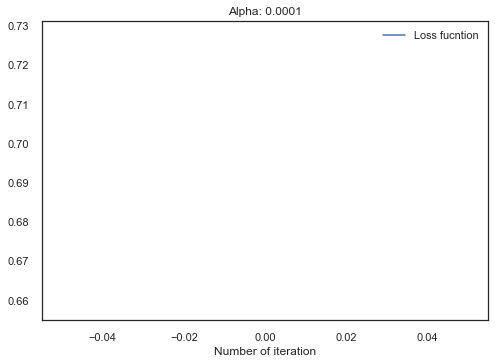

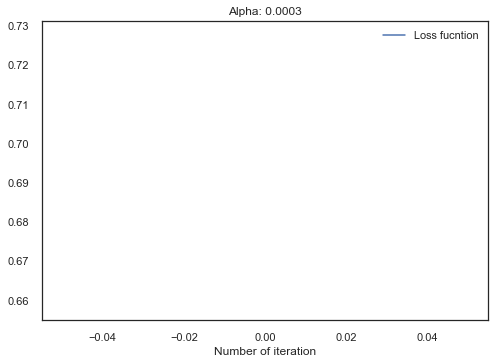

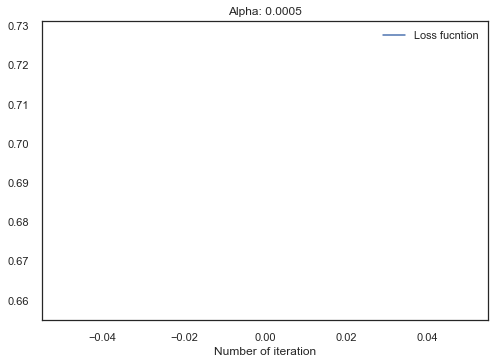

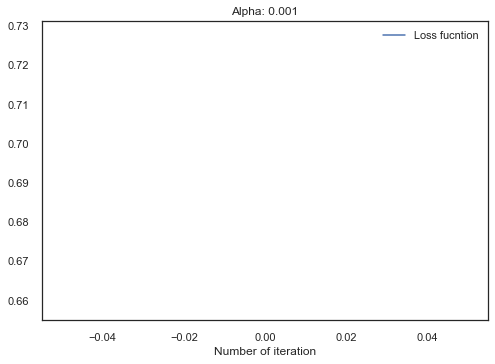

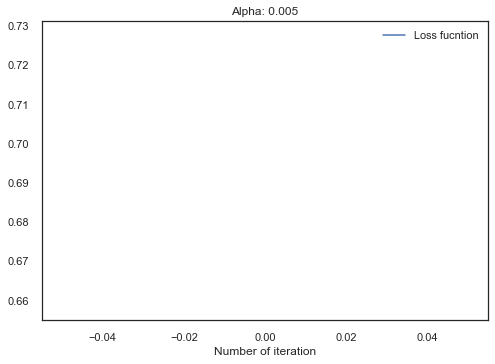

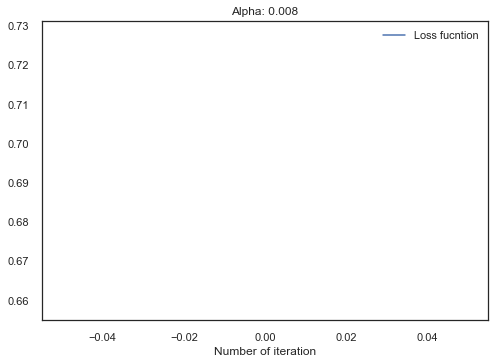

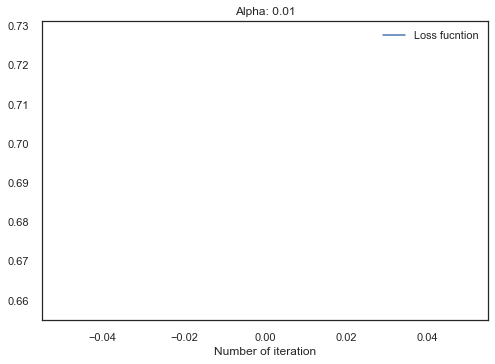

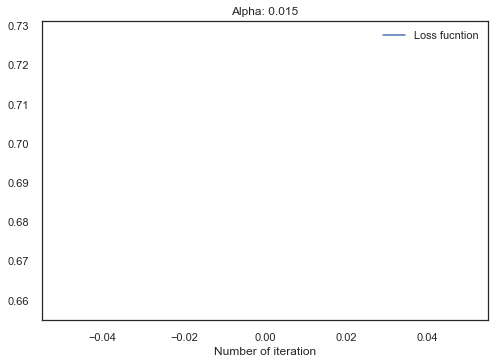

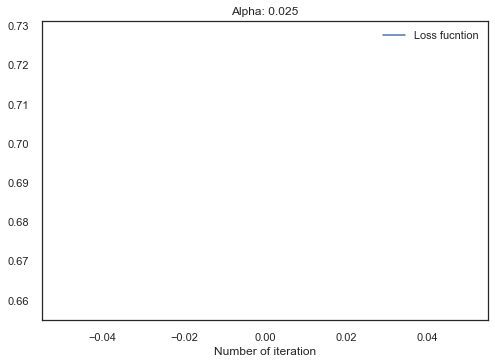

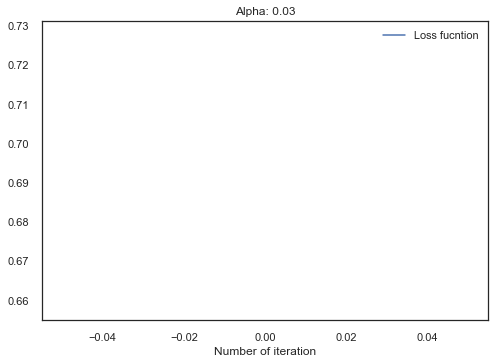

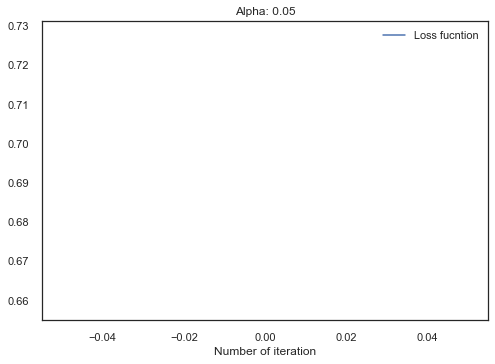

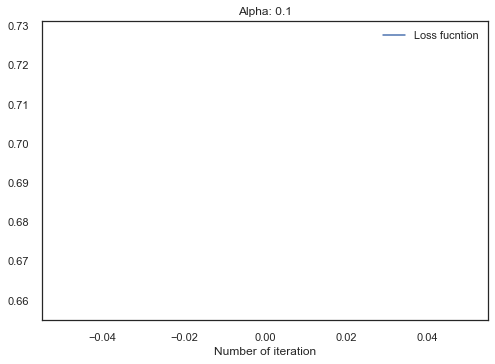

In [28]:
alphas = [0.0001,0.0003,0.0005,0.001,0.005,0.008,0.01,0.015,0.025,0.03,0.05,0.1]

for alpha in alphas:
    beta = myLogisticGD(Xl,Yl,init_beta,alpha,T)
    show_loss(loss_total,alpha)